#GRU with more epochs

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('sorted_energy_data.csv', parse_dates=['Datetime'], index_col='Datetime')
data = data.sort_index()
print(data.head(10))
df = data



                      NI_MW
Datetime                   
2004-05-01 01:00:00  9198.0
2004-05-01 02:00:00  8570.0
2004-05-01 03:00:00  8183.0
2004-05-01 04:00:00  7917.0
2004-05-01 05:00:00  7828.0
2004-05-01 06:00:00  7806.0
2004-05-01 07:00:00  8082.0
2004-05-01 08:00:00  8267.0
2004-05-01 09:00:00  8830.0
2004-05-01 10:00:00  9381.0


In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

# Normalize Data (Min-Max Scaling)
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['NI_MW'] = scaler.fit_transform(df['NI_MW'].values.reshape(-1, 1))
    return df, scaler

df_norm, scaler = normalize_data(df)  # Normalize the dataset

# Function to create sequences for GRU
def load_data(stock, seq_len):
    X_data = []
    y_data = []
    for i in range(seq_len, len(stock)):
        X_data.append(stock.iloc[i-seq_len:i, 0].values)  # Creating sequences for X
        y_data.append(stock.iloc[i, 0])  # Corresponding y values

    # Convert lists to numpy arrays
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data

# Calculate the index for the 80% split
train_size = int(len(df_norm) * 0.8)
test_size = len(df_norm) - train_size

# Split the data into training and test sets (80% training, 20% testing)
train_data = df_norm.iloc[:train_size]
test_data = df_norm.iloc[train_size:]

# Create sequences for training and testing
seq_len = 72  # Sequence length for GRU
X_train, y_train = load_data(train_data, seq_len)
X_test, y_test = load_data(test_data, seq_len)

# Create a validation set by splitting the training data (e.g., 80% for training, 20% for validation)
val_size = int(len(X_train) * 0.2)
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

# Reshape data to be used by GRU (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_val.shape = ', X_val.shape)
print('y_val.shape = ', y_val.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)


X_train.shape =  (37351, 72, 1)
y_train.shape =  (37351,)
X_val.shape =  (9337, 72, 1)
y_val.shape =  (9337,)
X_test.shape =  (11618, 72, 1)
y_test.shape =  (11618,)


In [3]:

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Load the previously saved model
model_path = '/content/gru_model-60 epochs.h5'  # Replace with your model's file path
model = load_model(model_path)
# Evaluate the model on training and testing data
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

# Print MSE for both train and test sets
print(f'Train MSE: {train_score}, Test MSE: {test_score}')

# Make predictions
predictions = model.predict(X_test)

Train MSE: [0.0001070400612661615, 8.031913603190333e-05], Test MSE: [0.00010288752673659474, 0.0]
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Load the previously saved model
model_path = '/content/GRU-model.h5'  # Replace with your model's file path
model = load_model(model_path)
# Evaluate the model on training and testing data
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

# Print MSE for both train and test sets
print(f'Train MSE: {train_score}, Test MSE: {test_score}')

# Make predictions
predictions = model.predict(X_test)

Train MSE: 0.0016094946768134832, Test MSE: 0.0014391737058758736
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Recreate the optimizer (e.g., Adam)
optimizer = Adam()

# Recompile the model with the correct loss function and metrics
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Assuming you have your training data loaded as X_train and y_train
# Continue training for 10 more epochs
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 6.7288e-05 - loss: 0.0015
Epoch 2/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 9.2077e-05 - loss: 7.9871e-04
Epoch 3/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 9.4423e-05 - loss: 5.6551e-04
Epoch 4/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 4.8211e-05 - loss: 5.3015e-04
Epoch 5/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 7.0206e-05 - loss: 5.2179e-04
Epoch 6/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 4.8485e-05 - loss: 4.9875e-04
Epoch 7/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 6.9041e-05 - loss: 4.7351e-04
Epoch 8/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 1.1042e-04 - loss: 4.7099e-04
Epoch 9/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 4.7352e-05 - loss: 4.4748e-04
Epoch 10/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 9.4619e-05 - loss: 4.3064e-04


In [ ]:
model.save("gru_model-20epochs.h5")

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Load the previously saved model
model_path = '/content/gru_model-20epochs.h5'  # Replace with your model's file path
model = load_model(model_path)

# Recreate the optimizer (e.g., Adam)
optimizer = Adam()

# Recompile the model with the correct loss function and metrics
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Assuming you have your training data loaded as X_train and y_train
# Continue training for 10 more epochs
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 6.5295e-05 - loss: 4.2322e-04
Epoch 2/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 6.6504e-05 - loss: 4.2511e-04
Epoch 3/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 3.3726e-05 - loss: 4.1172e-04
Epoch 4/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 1.0696e-04 - loss: 4.1130e-04
Epoch 5/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 1.0654e-04 - loss: 4.0992e-04
Epoch 6/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 5.1054e-05 - loss: 3.9226e-04
Epoch 7/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 1.8558e-05 - loss: 3.8538e-04
Epoch 8/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 3.7959e-05 - loss: 3.8523e-04
Epoch 9/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 3.7320e-05 - loss: 3.8919e-04
Epoch 10/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 5.5735e-05 - loss: 3.7955e-04


In [ ]:
model.save("gru_model-30 epochs.h5")

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

# Load the previously saved model
model_path = '/content/gru_model-30 epochs.h5'  # Replace with your model's file path
model = load_model(model_path)

# Recreate the optimizer (e.g., Adam)
optimizer = Adam()

# Recompile the model with the correct loss function and metrics
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Assuming you have your training data loaded as X_train and y_train
# Continue training for 10 more epochs
model.fit(X_train, y_train, epochs=30, batch_size=64)


Epoch 1/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 3.6928e-05 - loss: 3.6625e-04
Epoch 2/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 6.6935e-05 - loss: 3.4906e-04
Epoch 3/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 6.5013e-05 - loss: 3.5338e-04
Epoch 4/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 6.8046e-05 - loss: 3.3370e-04
Epoch 5/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 5.7177e-05 - loss: 3.3012e-04
Epoch 6/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 1.4177e-04 - loss: 3.3547e-04
Epoch 7/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 1.5434e-04 - loss: 3.5236e-04
Epoch 8/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 3.8530e-05 - loss: 3.5327e-04
Epoch 9/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 1.3135e-04 - loss: 3.2577e-04
Epoch 10/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 5.5599e-05 - loss: 3.3858e-04
Epoch 11/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 9s 

In [ ]:
model.save("gru_model-60 epochs.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Define the function to calculate and plot the metrics
def calculate_metrics(y_true, y_pred):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate sMAPE (Symmetric Mean Absolute Percentage Error)
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Calculate R²
    r2 = r2_score(y_true, y_pred)

    # Calculate MSLE (Mean Squared Logarithmic Error)
    msle = mean_squared_log_error(y_true, y_pred)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"sMAPE: {smape:.2f}%")
    print(f"R²: {r2:.4f}")
    print(f"MSLE: {msle:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual Values', color='blue')
    plt.plot(y_pred, label='Predicted Values', color='orange', alpha=0.7)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Assuming you have y_test and y_pred (predictions)
# Make sure both are reshaped properly for the model
# Rescale the predictions if necessary
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate and display the metrics
calculate_metrics(y_test_actual, y_pred_rescaled)


Rescaled Predictions: [12561.336 12359.155 12031.409 11868.321 11943.51 ]
Rescaled Actual Values: [[12772.]
 [12306.]
 [12472.]
 [12553.]
 [11960.]]


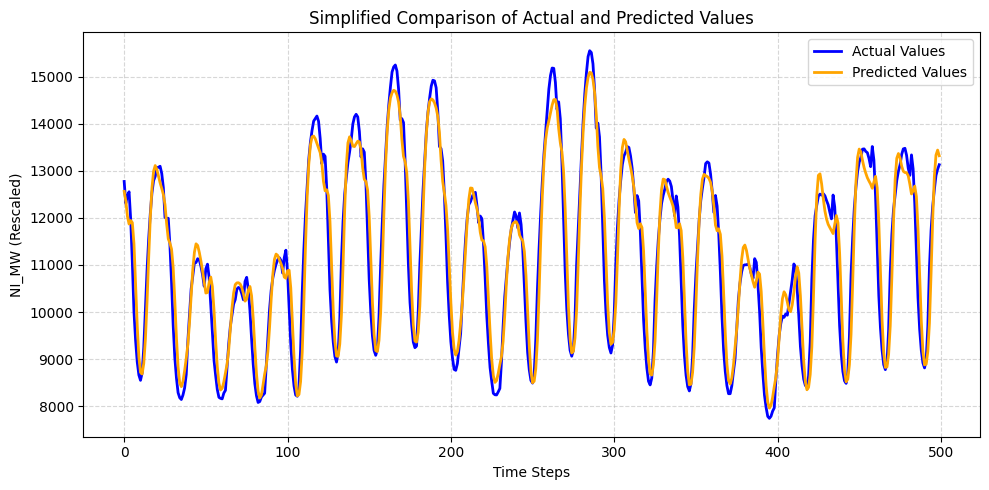

In [ ]:
# Print to verify the rescaling
print("Rescaled Predictions:", y_pred_rescaled[:5])
print("Rescaled Actual Values:", y_test_actual[:5])
import matplotlib.pyplot as plt

# Limit the data to the first 500 points for simplicity
subset = 500
y_pred_rescaled_subset = y_pred_rescaled[:subset]
y_test_actual_subset = y_test_actual[:subset]

# Plot the simplified graph
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual_subset, label="Actual Values", color='blue', linewidth=2)
plt.plot(y_pred_rescaled_subset, label="Predicted Values", color='orange', linewidth=2)
plt.title("Simplified Comparison of Actual and Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("NI_MW (Rescaled)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##After hyperparameter tuning of batch size and epochs

Rescaled Predictions: [12920.892 12488.213 12112.04  12696.397 11915.53 ]
Rescaled Actual Values: [[12772.]
 [12306.]
 [12472.]
 [12553.]
 [11960.]]


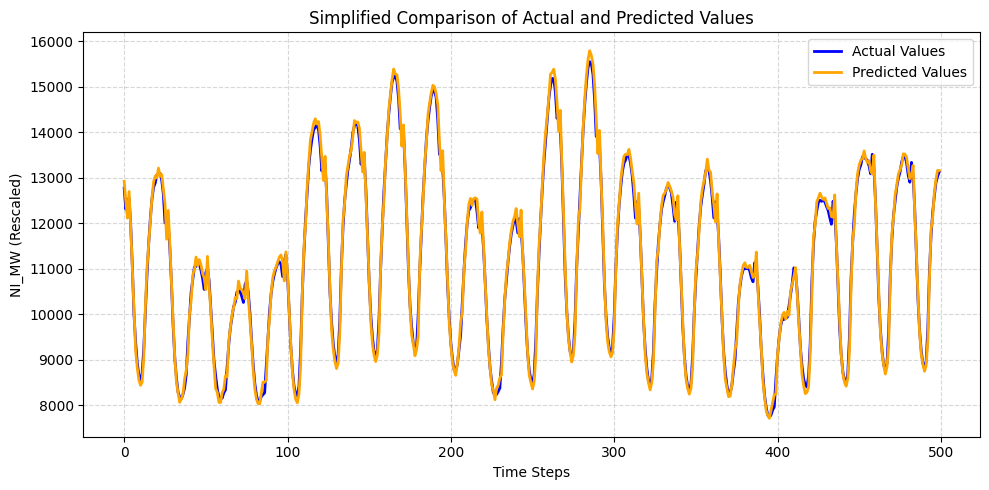

In [ ]:
# Print to verify the rescaling
print("Rescaled Predictions:", y_pred_rescaled[:5])
print("Rescaled Actual Values:", y_test_actual[:5])
import matplotlib.pyplot as plt

# Limit the data to the first 500 points for simplicity
subset = 500
y_pred_rescaled_subset = y_pred_rescaled[:subset]
y_test_actual_subset = y_test_actual[:subset]

# Plot the simplified graph
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual_subset, label="Actual Values", color='blue', linewidth=2)
plt.plot(y_pred_rescaled_subset, label="Predicted Values", color='orange', linewidth=2)
plt.title("Simplified Comparison of Actual and Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("NI_MW (Rescaled)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
y_pred=predictions
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the performance metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
smape = 100 * np.mean(2 * np.abs(y_pred_rescaled - y_test_rescaled) / (np.abs(y_test_rescaled) + np.abs(y_pred_rescaled)))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"GRU: RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, sMAPE: {smape:.2f}%, R²: {r2:.2f}")


GRU: RMSE: 168.66, MAE: 121.13, MAPE: 1.04%, sMAPE: 1.04%, R²: 0.99


<ipython-input-15-b627929dce11>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2010-01-01', periods=len(y_test_rescaled), freq='H')  # Example hourly timestamps


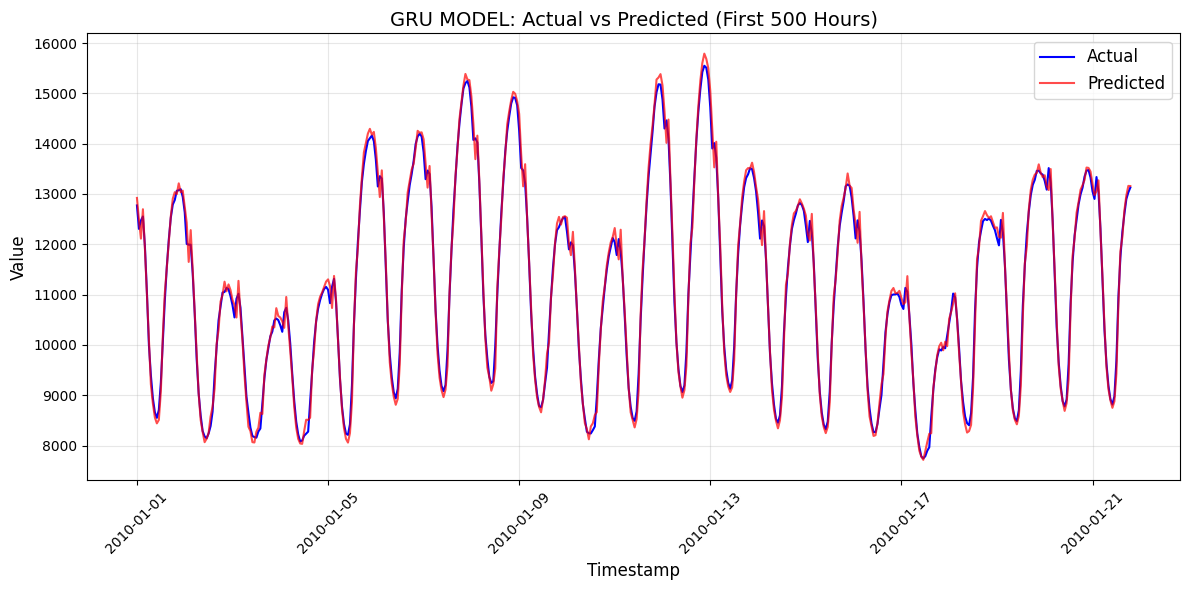

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample timestamps for the x-axis (adjust based on your actual data)
timestamps = pd.date_range(start='2010-01-01', periods=len(y_test_rescaled), freq='H')  # Example hourly timestamps

# Plot the first 500 points for visualization
plt.figure(figsize=(12, 6))
plt.plot(timestamps[:500], y_test_rescaled[:500], label='Actual', color='blue')
plt.plot(timestamps[:500], y_pred_rescaled[:500], label='Predicted', color='red', alpha=0.7)

# Customize the graph
plt.title("GRU MODEL: Actual vs Predicted (First 500 Hours)", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
